In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df= pd.read_csv('../forecasting_case_study.csv')

From our last week's conclusion, further verified by Hina, there are no NA values, Sales fields have the problem of outliers, and there are some zeros in the Sales field. I suggested to remove entries with zero sales and then verify whether outliers still exist.

In [2]:
df = df[df['Sales'] != 0]
df.count()

Product               1188
date                  1188
Sales                 1188
Price Discount (%)    1188
In-Store Promo        1188
Catalogue Promo       1188
Store End Promo       1188
Google_Mobility       1188
Covid_Flag            1188
V_DAY                 1188
EASTER                1188
CHRISTMAS             1188
dtype: int64

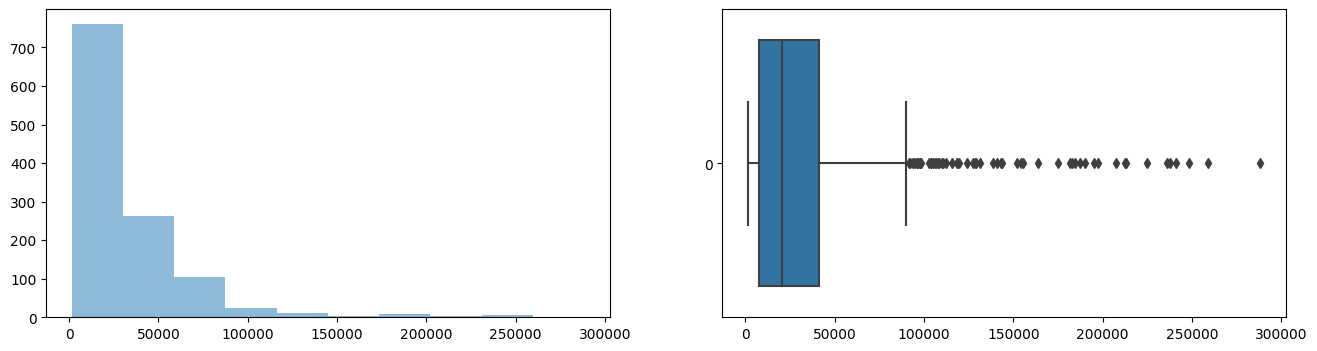

In [4]:
# utility function borrowed from Hina's code
def plot_hist(df, feature):
    plt.figure(figsize=(16,4))
    #Histogram
    plt.subplot(1,2,1)
    plt.hist(df[feature], alpha=0.5)
    #boxplot
    plt.subplot(1,2,2)
    sns.boxplot(df[feature], orient="h")
    plt.show

plot_hist(df, "Sales")

As we can see in the boxplot that a large number of outliers exist. Because sales is a kind of data that could be dramatically high in reality, we simply want to make outliers influence our model mildly. As Hina employs logarithm, which is a good practice, I suggest to use quantile based capping.

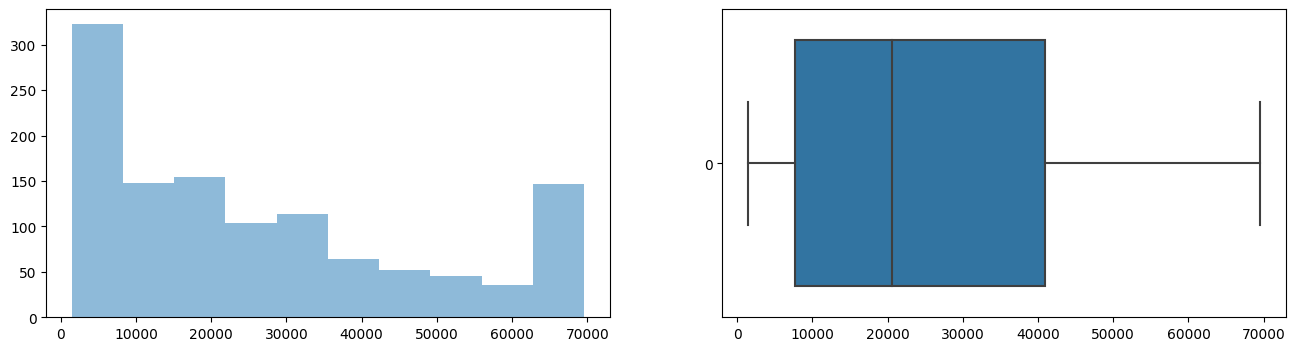

In [5]:
ninetieth_percentile = np.percentile(df["Sales"], 90)
df.loc[df["Sales"] >= ninetieth_percentile, "Sales"] = ninetieth_percentile
plot_hist(df, "Sales")

Outliers are now eliminated.

I also argue that Google_Mobility has no outlier problem as this set of data is strongly disturbed by zeros generated during non-covid period.

<function matplotlib.pyplot.show(close=None, block=None)>

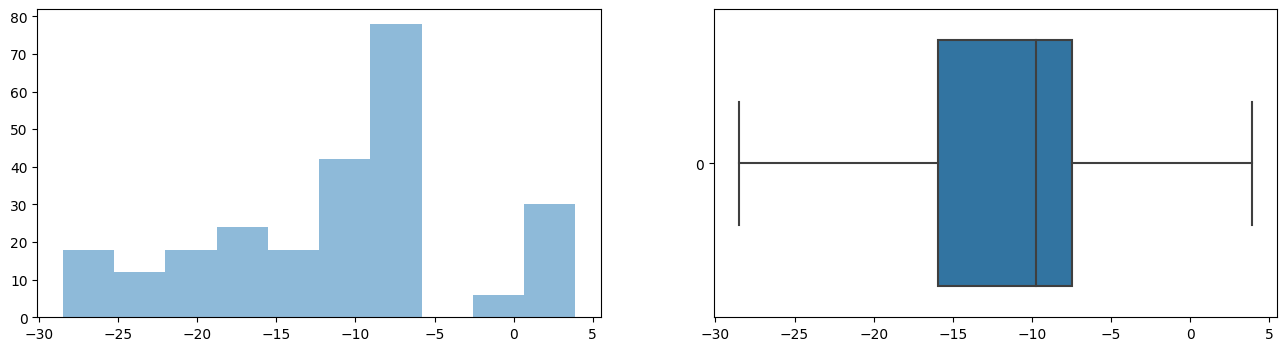

In [14]:
# remove zeros in Google_Mobility
df_1 = df[df['Google_Mobility'] != 0]
Google_Mobility = df_1['Google_Mobility'].to_numpy()
plt.figure(figsize=(16,4))
#Histogram
plt.subplot(1,2,1)
plt.hist(Google_Mobility, alpha=0.5)
#boxplot
plt.subplot(1,2,2)
sns.boxplot(Google_Mobility, orient="h")
plt.show

Because covid_flag and Google_Mobility are only valid during covid period, it is a reasonable consideration to train two different models to avoid overfitting on these two features. In this case, zeros of Google_Mobility will not be concerning and covid_flag can be removed.